# Chapter 4 – Training Models
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alirezatheh/handson-ml3-notes/blob/main/notebooks/04_training_models.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/alirezatheh/handson-ml3-notes/blob/main/notebooks/04_training_models.ipynb)

## Linear Regression
A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*).

**Equation 4-1** Linear regression model prediction
$$
\widehat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_nx_n
$$
- $\widehat{y}$: The predicted value
- $n$: The number of features
- $x_i$: The $i^{\text{th}}$ feature value
- $\theta_j$: The $j^{\text{th}}$ model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, $\dots$, $\theta_n$

A vectorized form:

**Equation 4-2** Linear regression model prediction (vectorized form)
$$
\widehat{y}=h_{\boldsymbol{\theta}}(\mathbf{x})=\boldsymbol{\theta}\cdot\mathbf{x}
$$
- $h_{\boldsymbol{\theta}}$: The hypothesis function, using the model parameters $\boldsymbol{\theta}$
- $\boldsymbol{\theta}$: The model’s *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, $\dots$, $\theta_n$
- $\mathbf{x}$: The instance’s *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to 1
- $\boldsymbol{\theta}\cdot\mathbf{x}$: The dot product of the vectors $\boldsymbol{\theta}$ and $\mathbf{x}$, which is equal to $\theta_0x_0+\theta_1x_1+\theta_2x_2+\dots+\theta_nx_n$

**Note**: In machine learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If $\boldsymbol{\theta}$ and $\mathbf{x}$ are column vectors, then the prediction is $\widehat{y}=\boldsymbol{\theta}^\top\mathbf{x}$, where $\boldsymbol{\theta}^\top\mathbf{x}$ is the matrix multiplication of $\boldsymbol{\theta}^\top$ and $\mathbf{x}$. It is the same prediction, except that it is now represented as a single-cell matrix rather than a scalar value. We will use this notation to avoid switching between dot products and matrix multiplications.

### The Normal Equation
To find the value of $\boldsymbol{\theta}$ that minimizes the MSE, there exists a *closed-form solution*, in other words, a mathematical equation that gives the result directly.

**Equation 4-4** Normal equation
$$
\widehat{\boldsymbol{\theta}}
=\left(\mathbf{X}^{\top}\mathbf{X}\right)^{-1}\mathbf{X}^{\top}\mathbf{y}
$$
- $\widehat{\boldsymbol{\theta}}$: The value of $\boldsymbol{\theta}$ that minimizes the cost function
- $\mathbf{y}$: The vector of target values containing $y^{(1)}$ to $y^{(m)}$

Let’s implement it:

In [1]:
import numpy as np

# To make this code example reproducible
np.random.seed(42)
# Number of instances
m = 100
# Column vector
X = 2 * np.random.rand(m, 1)
# Column vector
y = 4 + 3 * X + np.random.randn(m, 1)

In [2]:
from sklearn.preprocessing import add_dummy_feature

# Add x0 = 1 to each instance
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

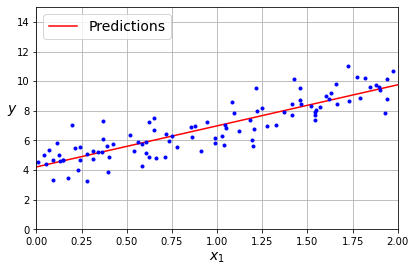

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper left')

plt.show()

We can also use Scikit-Learn’s `LinearRegression`:

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which we could call directly:

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the *pseudoinverse* of $\mathbf{X}$ (specifically the Moore-Penrose inverse). We can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [9]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

The pseudoinverse is computed using a standard matrix factorization technique called *singular value decomposition* (SVD) that can decompose $\mathbf{X}$ into $\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top$ (see `np.linalg.svd()`) and pseudoinverse is computed as
$\mathbf{X}^+=\mathbf{V}\mathbf{\Sigma}^+\mathbf{U}^\top$. To compute the matrix $\mathbf{\Sigma}^+$, the algorithm takes $\mathbf{\Sigma}$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the result. This approach is more efficient than the Normal equation, and handles edge cases nicely: Work if the matrix $\mathbf{X}^{\top}\mathbf{X}$ is not invertible (i.e., singular), such as if $m<n$ or if some features are redundant.

### Computational Complexity
- Normal Equation: Computing the inverse of $\mathbf{X}^{\top}\mathbf{X}$ which is an $(n+1)\times(n+1)$ matrix, takes $O(n^{2.4})$ to $O(n^3)$. depending on the implementation.
- SVD: $O(n^2)$

**Warning**: Both scale well with $m$ but poorly with $n$.

## Gradient Descent
It’s a generic optimization algorithm whose idea is to tweak parameters iteratively in order to minimize a cost function. It measures the local
gradient of the error function with regard to the parameter vector $\boldsymbol{\theta}$, and it goes in the direction of descending gradient. Once the gradient is zero, we have reached a minimum.

In practice, we start by filling $\boldsymbol{\theta}$ with random values (this is called *random initialization*). Then improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm *converges* to a minimum. Size of the steps, determined by the *learning rate* hyperparameter.

<center>
  <img 
    src="../images/04/gradient_descent.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

If the learning rate is too small, then the algorithm will have to go through many iterations to converge.

<center>
  <img 
    src="../images/04/learning_rate_too_small.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

If the learning rate is too high, we might jump across the valley and end up on the other side, possibly even higher up than we were before. This might make the algorithm diverge.

<center>
  <img 
    src="../images/04/learning_rate_too_high.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

The MSE is a *convex function*, which means that if we pick any two points on the curve, the line segment joining them is never below the curve. It is also a continuous function with a slope that never changes abruptly (Technically speaking, its derivative is *Lipschitz continuous*). Consequence? gradient descent is guaranteed to approach arbitrarily closely the global minimum (if we wait long enough and learning rate is not too high).

But, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult.

<center>
  <img 
    src="../images/04/gradient_descent_pitfalls.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

**Warning**: When using gradient descent, we should ensure that all features have a similar scale, or else it will take much longer to converge.

### Batch Gradient Descent
Let’s do the derivatives:

**Equation 4-5** Partial derivatives of the cost function
$$
\frac{\partial}{\partial{\theta_j}}\text{MSE}(\boldsymbol{\theta})
=\frac{2}{m}\sum_{i=1}^m
\left(\boldsymbol{\theta}^\top\mathbf{x}^{(i)}-y^{(i)}\right)x_j^{(i)}
$$

**Equation 4-6** Gradient vector of the cost function
$$
\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})
=\begin{pmatrix}
\frac{\partial}{\partial{\theta_0}}\text{MSE}(\boldsymbol{\theta})
\\\vdots
\\\frac{\partial}{\partial{\theta_n}}\text{MSE}(\boldsymbol{\theta})
\end{pmatrix}
=\frac{2}{m}\mathbf{X}^\top(\mathbf{X}\boldsymbol{\theta}-\mathbf{y})
$$

**Warning**: This formula involves calculations over the full training set, at each gradient descent step! This is why the algorithm is called *batch gradient descent*. It scales poorly with $m$ but good with $n$, Unlike SVD.

**Equation 4-7** Gradient descent step
$$
\boldsymbol{\theta}^{(\text{next step})}
=\boldsymbol{\theta}-\eta\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})
$$
- $\eta$: Learning rate

Let’s implement it:

In [10]:
# Learning rate
eta = 0.1
n_epochs = 1000
# Number of instances
m = len(X_b)

np.random.seed(42)
# Randomly initialized model parameters
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

Each iteration over the training set is called an *epoch*.

We typically set a very large number of epochs but interrupt the algorithm when the gradient vector becomes tiny (that is, when its norm becomes smaller than a tiny number $\epsilon$ called the *tolerance*), Because this happens when gradient descent has (almost) reached the minimum.

<div style="border: 1px solid;">

#### Convergence Rate
When the cost function is convex and its slope does not change abruptly (just like MSE), batch gradient descent with a fixed learning rate will eventually converge to the optimal solution, but we may have to wait a while: it can take $O(1/\epsilon)$ iterations to reach the optimum within a range of $\epsilon$, depending on the shape of the cost function.
</div>

### Stochastic Gradient Descent
At the opposite extreme, *stochastic gradient descent* picks a random instance in the training set at every step and computes the gradients based only on that single instance, so it scales well with $m$. Due to its stochastic nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around:

<center>
  <img 
    src="../images/04/batch_vs_stochastic_gd_convergance.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. The function that determines the learning rate at each iteration is called the *learning schedule*. If the learning rate is reduced
- Too quickly, we may get stuck in a local minimum, or even end up frozen halfway to the minimum.
- Too slowly, we may jump around the minimum for a long time and end up with a suboptimal solution if we halt training too early.

**Warning**: When using stochastic gradient descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training.

Let’s implements it:

In [12]:
n_epochs = 50
# Learning schedule hyperparameters
t0, t1 = 5, 50


def learning_schedule(t: int) -> float:
    return t0 / (t + t1)


np.random.seed(42)
# Random initialization
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        # For SGD, do not divide by m
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

We can also use Scikit-Learn’s `SGDRegressor`:

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=42,
)
# y.ravel() because fit() expects 1D targets
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

**Tip**: Some Scikit-Learn estimators have a `partial_fit()` method that we can call to run a single round of training on one or more instances (it ignores hyperparameters like `max_iter` or `tol`). Other models have a `warm_start`, calling the `fit()` method with `warm_start=True` will just continue training where it left off (and some have both).

### Mini-Batch Gradient Descent
At each step, computes the gradients on small random sets of instances called *mini-batches*. The main advantage of mini-batch GD over stochastic GD is that we can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Comparison:

| Algorithm       | Large $m$ | Out-of-core support | Large $n$ | Hyperparams | Scaling required | Scikit-Learn       |
|:----------------|:----------|:--------------------|-----------|-------------|------------------|--------------------|
| Normal equation | Fast      | No                  | Slow      | 0           | No               | N/A                |
| SVD             | Fast      | No                  | Slow      | 0           | No               | `LinearRegression` |
| Batch GD        | Slow      | No                  | Fast      | 2           | Yes              | N/A                |
| Stochastic GD   | Fast      | Yes                 | Fast      | $\geq$ 2    | Yes              | `SGDRegresseor`    |
| Mini-batch GD   | Fast      | Yes                 | Fast      | $\geq$ 2    | Yes              | N/A                |

## Polynomial Regression
In this technique we add powers of each feature as new features, then train a linear model on this extended set of features.

Let’s implement it:

In [16]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [18]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

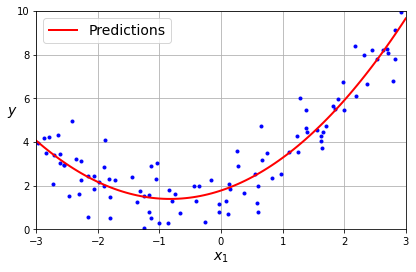

In [20]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

**Warning**: `PolynomialFeatures(degree=d)` transforms an array containing $n$ features into an array containing $(n+d)!/d!n!$ features.

## Learning Curves
*Learning curves* are plots of the model’s training error and validation error as a function of the training iteration. Scikit-Learn’s `learning_curve()` retrains the model on growing subsets of the training set, but if the model supports incremental learning (i.e has `partial_fit()` or `warm_start`), it will train the model incrementally by setting `exploit_incremental_learning=True`.

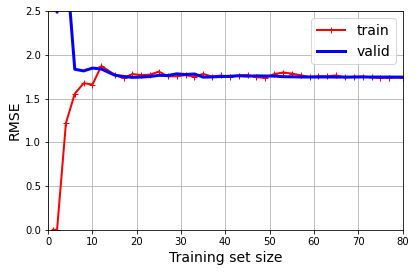

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring='neg_root_mean_squared_error',
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0, 80, 0, 2.5])

plt.show()

This model is underfitting, both curves reached a plateau; they are close and fairly high.

**Tip**: If our model is underfitting, adding more training examples will not help. We need a better model or come up with better features.

For a 10th-degree polynomial model:

In [22]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression(),
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring='neg_root_mean_squared_error',
)

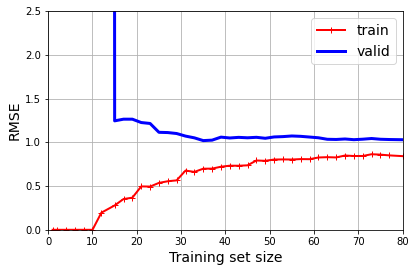

In [23]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.legend(loc='upper right')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

These learning curves look a bit like the previous ones, but there are two very important differences:
- The error on the training data is much lower than before.
- There is a gap between the curves, it’s overfitting.

**Tip**: One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

<style>ul {list-style-type: none;}</style>
<div style="border: 1px solid;">

### The Bias/Variance Trade-Off
An important theoretical result of statistics and machine learning is the fact
that a model’s generalization error can be expressed as the sum of three very
different errors:

*Bias*
- This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

*Variance*
- This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

*Irreducible error*
- This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.
<div>

## Regularized Linear Models
For a linear model, regularization is typically achieved by constraining the weights of the model. There three different ways to constrain the weights:

### Ridge Regression
A regularized version of linear regression which forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Also called *Tikhonov regularization*.

**Equation 4-8** Ridge regression cost function
$$
J(\boldsymbol{\theta})
=\text{MSE}(\boldsymbol{\theta})+\frac{\alpha}{m}\sum_{i=1}^n{\theta_i}^2
$$
- $\frac{\alpha}{m}\sum_{i=1}^n{\theta_i}^2$: The *regularization term*
- $\alpha$: Controls how much we want to regularize the model

If we define $\mathbf{w}$ as the vector of feature weights ($\boldsymbol{\theta}_1$ to $\boldsymbol{\theta}_n$), then the regularization term is equal to $\alpha(\|\mathbf{w}\|_2)^2/m$ and for batch gradient descent just add $2\alpha\mathbf{w}/m$ to the part of the MSE gradient vector that corresponds to the feature weights, without adding anything to the gradient of the bias term.

**Warning**: It is important to scale the data for most regularized models.

We can perform ridge regression also by computing a closed-form equation:

**Equation 4-9** Ridge regression closed-form solution
$$
\widehat{\boldsymbol{\theta}}
=\left(\mathbf{X}^\top\mathbf{X}+\alpha\mathbf{A}\right)^{-1}
\mathbf{X}^\top\mathbf{y}
$$
- $\mathbf{A}$: The $(n+1)\times(n+1)$ identity matrix, except with a 0 in the
  top-left cell

Let’s generate a very small and noisy linear dataset:

In [24]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

A closed-form variant that uses a matrix factorization technique by André-Louis
Cholesky:

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

And using stochastic gradient descent:

In [26]:
sgd_reg = SGDRegressor(
    penalty='l2',
    alpha=0.1 / m,
    tol=None,
    max_iter=1000,
    eta0=0.01,
    random_state=42,
)
# y.ravel() because fit() expects 1D targets
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

Alternatively, we can use the `Ridge` class with the `'sag'` solver. Stochastic average GD is a variant of stochastic GD. For more details, see the
presentation [“Minimizing Finite Sums with the Stochastic Average Gradient Algorithm”](https://homl.info/12) by Mark Schmidt et al. from the University of British Columbia.

**Tip**: The `RidgeCV` class automatically tunes hyperparameters using cross-validation. It’s like `GridSearchCV`, but optimized for ridge regression
and runs *much* faster. There is also *LassoCV* and *ElasticNetCV*.

### Lasso Regression
*Least absolute shrinkage and selection operator regression* (usually simply called *lasso regression*).

**Equation 4-10** Lasso regression cost function
$$
J(\boldsymbol{\theta})
=\mathrm{MSE}(\boldsymbol{\theta})+2\alpha\sum_{i=1}^n|\theta_i|
$$

**Note**: The $\ell_1$ norm is multiplied by $2\alpha$, whereas the $\ell_2$ norm was multiplied by $\alpha/m$ in ridge regression. These factors were chosen to ensure that the optimal $\alpha$ value is independent from the training set size: different norms lead to different factors (see [Scikit-Learn issue #15657](https://github.com/scikit-learn/scikit-learn/issues/15657) for more details).

An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features. In other words, lasso regression automatically performs feature selection and outputs a *sparse* model with few nonzero feature weights.

**Tip**: To keep gradient descent from bouncing around the optimum at the end when using lasso regression, we need to gradually reduce the learning rate during training. It will still bounce around, but the steps will get smaller and smaller, so it will converge.

The lasso cost function is not differentiable at $\theta_i=0$, but gradient descent still works if we use a *subgradient vector* $\mathbf{g}$ instead when any $\theta_i=0$. A subgradient vector at a nondifferentiable point is as an intermediate vector between the gradient vectors around that point.

**Equation 4-11** Lasso regression subgradient vector
$$
g(\boldsymbol{\theta}, J)
=\nabla_{\boldsymbol{\theta}}\mathrm{MSE}(\boldsymbol{\theta})
=2\alpha\begin{pmatrix}
\text{sign}(\theta_1)\\
\vdots
\\\text{sign}(\theta_n)
\end{pmatrix}
\;\;\text{where}\;\;\text{sign}(\theta_i)
=\begin{cases}
-1&\text{if}\;\theta_i<0
\\0&\text{if}\;\theta_i=0
\\+1&\text{if}\;\theta_i>0
\end{cases}
$$

Here is a small Scikit-Learn example:

In [27]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

We could instead use `SGDRegressor(penalty='l1', alpha=0.1)`.

### Elastic Net Regression
*Elastic net regression* is a middle ground between ridge regression and lasso regression.

**Equation 4-12** Elastic net cost function
$$
J(\boldsymbol{\theta})
=\mathrm{MSE}(\boldsymbol{\theta})+r\left(2\alpha\sum_{i=1}^n|\theta_i|\right)
+(1-r)\left(\frac{\alpha}{m}\sum_{i=1}^n\theta_i^2\right)
$$

When to use which? Ridge is a good default, but if we suspect that only a few features are useful, we should prefer lasso or elastic net. Elastic net is preferred over lasso because lasso may behave erratically when $n>m$ or when several features are strongly correlated.

Here is a small Scikit-Learn example:

In [28]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping
A very different way to regularize iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch”.

Let’s go back to the quadratic dataset we used earlier:

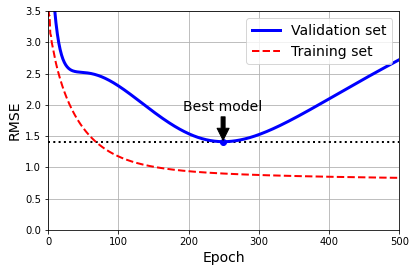

In [29]:
from copy import deepcopy

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False), StandardScaler()
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
# It’s for the figure below
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # We evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# This section generates the figure
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate(
    'Best model',
    xy=(best_epoch, best_valid_rmse),
    xytext=(best_epoch, best_valid_rmse + 0.5),
    ha='center',
    arrowprops=dict(facecolor='black', shrink=0.05),
)
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], 'k:', linewidth=2)
plt.plot(val_errors, 'b-', linewidth=3, label='Validation set')
plt.plot(best_epoch, best_valid_rmse, 'bo')
plt.plot(train_errors, 'r--', linewidth=2, label='Training set')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

**Note**: Using `copy.deepcopy()` copies both the model’s hyperparameters *and* the learned parameters, while `sklearn.base.clone()` only copies the model’s hyperparameters.

**Tip**: In SGD and Mini-batch GD the curves are not so smooth, so we should stop only after validation error has been above the minimum for some time then roll back the model parameters to the point where the validation error was at a minimum.

## Logistic Regression
Some regression algorithms can be used for classification (and vice versa). *Logistic regression* (also called *logit regression*) is commonly used to estimate the probability that an instance belongs to a particular class.

### Estimating Probabilities
Instead of outputting the result directly logistic regression outputs the *logistic* of this result:

**Equation 4-13** Logistic regression model estimated probability (vectorized form)
$$
\widehat{p}
=h_{\boldsymbol{\theta}}(\mathbf{x})=\sigma(\boldsymbol{\theta}^\top\mathbf{x})
$$

The logistic, noted $\sigma(\cdot)$, is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.

**Equation 4-14** Equation 4-14. Logistic function
$$
\sigma(t)=\frac{1}{1+\exp(−t)}
$$

<center>
  <img 
    src="../images/04/logistic_function.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

Once the logistic regression model has estimated the probability it can make its prediction easily:

**Equation 4-15** Logistic regression model prediction using a 50% threshold probability
$$
\widehat{y}=\begin{cases}
0&\text{if}\;\widehat{p}<0.5
\\1&\text{if}\;\widehat{p}\geq0.5
\end{cases}
$$

**Note**: The score $t$ is often called the *logit*. The name comes from the fact that the logit function, defined as $\text{logit}(p)=\log(p/(1-p))$, is the inverse of the logistic function. The logit is also called the *log-odds*, since it is the log of the ratio between the estimated probability for the *positive class* and the estimated probability for the *negative class*.

### Training and Cost Function
The objective of training is to set the parameter vector $\boldsymbol{\theta}$ so that the model estimates high probabilities for positive instances and low probabilities for negative instances. This idea is captured by this cost function:

**Equation 4-16** Cost function of a single training instance
$$
c(\boldsymbol{\theta})=\begin{cases}
-\log(\widehat{p})&\text{if}\;y=1
\\-\log(1-\widehat{p})&\text{if}\;y=0
\end{cases}
$$

This cost function makes sense because $-\log(\widehat{t})$ is large when $t$ approaches 0 and close to 0 when it is close to 1. So for a positive instance cost is large when $\widehat{p}$ is close to 0 and it is be close to 0 when $\widehat{p}$ is close 1. And for a negative instance cost is large when $\widehat{p}$ is close to 1 and it is close to 0 when $\widehat{p}$ is close 0.

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the *log loss*:

**Equation 4-17** Logistic regression cost function (*log loss*)
$$
J(\boldsymbol{\theta})
=-\frac{1}{m}\sum_{i=1}^m\left[
y^{(i)}\log(\widehat{p}^{(i)})
+(1-y^{(i)})\log(1-\widehat{p}^{(i)})
\right]
$$

**Warning**: The log loss was not just pulled out of a hat. It can be shown mathematically (using Bayesian inference) that minimizing this loss will result in the model with the *maximum likelihood* of being optimal, assuming that the instances follow a Gaussian distribution around the mean of their class. When we use the log loss, this is the implicit assumption we are making. The more wrong this assumption is, the more biased the model will be.

This cost function is convex, so gradient descent (or any other optimization algorithm) is guaranteed to find the global minimum. Here are the partial derivatives of the cost function with regard to the $j^\text{th}$ model parameter $\theta_j$:

**Equation 4-18** Logistic cost function partial derivatives
$$
\frac{\partial}{\partial{\theta_j}}\mathbf{J}(\boldsymbol{\theta})
=\frac{1}{m}\sum_{i=1}^m
\left(\sigma(\boldsymbol{\theta}^\top\mathbf{x}^{(i)})-y^{(i)}\right)x_j^{(i)}
$$

### Decision Boundaries
We the use iris dataset which contains the sepal and petal length and width of 150 iris flowers of three different species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*.

In [30]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [31]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [32]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [33]:
# Note that the instances are not shuffled
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let’s build a classifier to detect the *Iris virginica* type based only on the petal width feature:

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

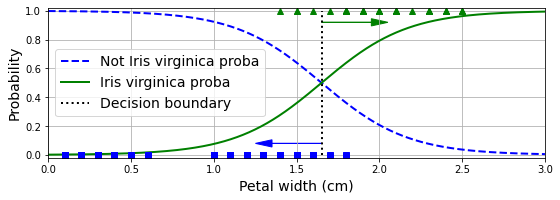

In [36]:
# Reshape to get a column vector
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))
plt.plot(
    X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Iris virginica proba'
)
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica proba')
plt.plot(
    [decision_boundary, decision_boundary],
    [0, 1],
    'k:',
    linewidth=2,
    label='Decision boundary',
)

# This section beautifies the figure
plt.arrow(
    x=decision_boundary,
    y=0.08,
    dx=-0.3,
    dy=0,
    head_width=0.05,
    head_length=0.1,
    fc='b',
    ec='b',
)
plt.arrow(
    x=decision_boundary,
    y=0.92,
    dx=0.3,
    dy=0,
    head_width=0.05,
    head_length=0.1,
    fc='g',
    ec='g',
)
plt.plot(X_train[y_train == 0], y_train[y_train == 0], 'bs')
plt.plot(X_train[y_train == 1], y_train[y_train == 1], 'g^')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc='center left')
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [37]:
decision_boundary

1.6516516516516517

In [38]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

**Note**: The hyperparameter controlling the regularization strength of a Scikit-Learn `LogisticRegression` model is not `alpha` (as in other linear
models), but its inverse: `C`. The higher the value of `C`, the less the model is regularized. Scikit-Learn actually adds an $\ell_2$ penalty by default.

Let’s try with two features:

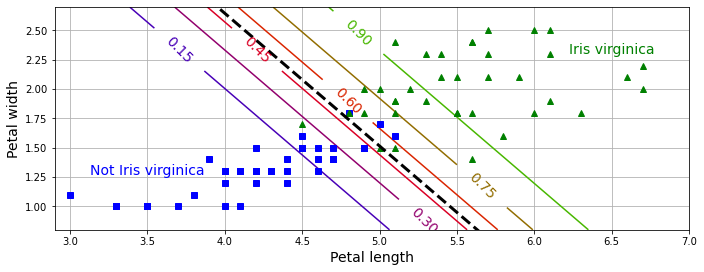

In [39]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# For the contour plot
# x0.shape = (200, 500)
# x1.shape = (200, 500)
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
# One instance per point on the figure
# X_new.shape = (200×500, 2)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
# zz.shape = (200, 500)
zz = y_proba[:, 1].reshape(x0.shape)

# For the decision boundary
left_right = np.array([2.9, 7])
# We have x0 value and want x1 value, we compute it using h=0
boundary = -(
    (log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
    / log_reg.coef_[0, 1]
)

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'bs')
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'g^')
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, 'k--', linewidth=3)
plt.text(3.5, 1.27, 'Not Iris virginica', color='b', ha='center')
plt.text(6.5, 2.3, 'Iris virginica', color='g', ha='center')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right).

### Softmax Regression
To support multiple classes directly, without having to train and combine multiple binary classifiers, we use *softmax regression*, or *multinomial logistic regression*.

The idea is simple: when given an instance $\mathbf{x}$, the softmax regression model first computes a score $s_k(\mathbf{x})$ for each class $k$, then estimates the probability of each class by applying the *softmax function* (also called the *normalized exponential*) to the scores.

**Equation 4-19** Softmax score for class $k$
$$
s_k(\mathbf{x})=(\boldsymbol{\theta}^{(k)})^\top\mathbf{x}
$$

All $\boldsymbol{\theta}^{(k)}$ vectors are typically stored as rows in a *parameter matrix* $\mathbf{\Theta}$.

**Equation 4-20** Softmax function
$$
\widehat{p}_k=\sigma(\mathbf{s}(\mathbf{x}))_k
=\frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^K\exp(s_j(\mathbf{x}))}
$$
- $K$: The number of classes
- $\mathbf{s}(\mathbf{x})$: Vector containing the scores of each class for the instance $\mathbf{x}$
- $\sigma(\mathbf{s}(\mathbf{x}))_k$: The estimated probability that the instance $\mathbf{x}$ belongs to class $k$, given the scores of each class for that instance

By default the softmax regression classifier predicts the class with the highest estimated probability:

**Equation 4-21** Softmax regression classifier prediction
$$
\widehat{y}
=\underset{k}{\text{argmax}}\;\sigma(\mathbf{s}(\mathbf{x}))_k
=\underset{k}{\text{argmax}}\;s_k(\mathbf{x})
=\underset{k}{\text{argmax}}\;((\boldsymbol{\theta}^{(k)})^\top\mathbf{x})
$$
- $\underset{k}{\text{argmax}}$: Returns the value of a variable $k$ that maximizes a function

The objective for training is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost below, called the *cross entropy*, works because it penalizes the model when it estimates a low probability for a target class.

**Equation 4-22** Cross entropy cost function
$$
J(\mathbf{\Theta})
=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}\log(\widehat{p}_k^{(i)})
$$
- $y_k^{(i)}$: The target probability that the $i^{\text{th}}$ instance belongs to class $k$

<div style="border: 1px solid;">

#### Cross Entropy
Cross entropy originated from Claude Shannon’s *information theory*. If we want to efficiently transmit information about the weather every day and have eight options (sunny, rainy, etc.), we could encode each option using 3 bits. Or if we think it will be sunny almost every day, it would be much more efficient to code “sunny” on just one bit (0) and the other seven options on four bits (starting with a 1). Cross entropy measures the average number of bits we actually send per option. If our assumption about the weather is perfect, cross entropy will be equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if our assumption is wrong (e.g., if it rains often), cross entropy will be greater by an amount called the *Kullback–Leibler (KL) divergence*. 

The cross entropy between two probability distributions $p$ and $q$ is defined as $H(p,q)=-\sum_xp(x)\;\log\;q(x)$. For more info check out [Aurélien Géron’s video on the subject](https://homl.info/xentropy).
</div>

The gradient vector of this cost function with regard to $\boldsymbol{\theta}^{(k)}$:

**Equation 4-23** Cross entropy gradient vector for class $k$
$$
\nabla_{\boldsymbol{\theta}}^{(k)}J(\mathbf{\Theta})
=\frac{1}{m}\sum_{i=1}^m
\left(\widehat{p}_k^{(i)}−y_k^{(i)}\right)\mathbf{x}^{(i)}
$$

Let’s use softmax regression to classify the iris plants into all three classes:

In [40]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

`solver='lbfgs'` is the default.

In [41]:
softmax_reg.predict([[5, 2]])

array([2])

In [42]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

Let’s plot the decision boundary:

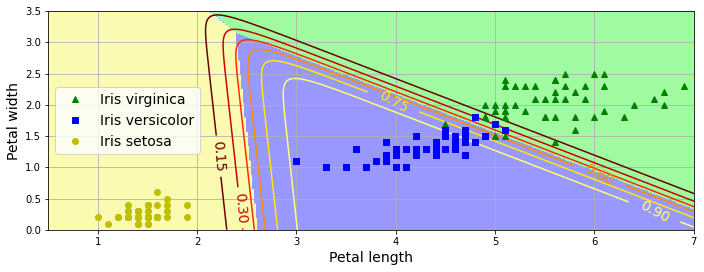

In [43]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], 'g^', label='Iris virginica')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label='Iris setosa')

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap='hot')
plt.clabel(contour, inline=1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='center left')
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

## Exercises
1. Which linear regression training algorithm can we use if we have a training set with millions of features?
> We can use Stochastic Gradient Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But we cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) with the number of features.
2. Suppose the features in our training set have very different scales. Which algorithms might suffer from this, and how? What can we do about it?
> In this case the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this we should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.
3. Can gradient descent get stuck in a local minimum when training a logistic regression model?
> No, because the cost function is convex. *Convex* means that if we draw a straight line between any two points on the curve, the line never crosses the curve.
4. Do all gradient descent algorithms lead to the same model, provided us let them run long enough?
> If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless we gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if we let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.
5. Suppose we use batch gradient descent and we plot the validation error at every epoch. If we notice that the validation error consistently goes up, what is likely going on? How can we fix this?
> One possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and we should reduce the learning rate. However, if the training error is not going up, then our model is overfitting the training set and we should stop training.
6. Is it a good idea to stop mini-batch gradient descent immediately when the validation error goes up?
> Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is guaranteed to make progress at every single training iteration. So if we immediately stop training when the validation error goes up, we may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), we can revert to the best saved model.
7. Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can we make the others converge as well?
> Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time (or Mini-batch GD with a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless we gradually reduce the learning rate.
8. Suppose we are using polynomial regression. We plot the learning curves and we notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?
> This is likely because our model is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing we can try is to regularize the model e.g. by adding an $\ell_2$ penalty (Ridge) or an $\ell_1$ penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, we can try to increase the size of the training set.
9. Suppose we are using ridge regression and we notice that the training error and the validation error are almost equal and fairly high. Would we say that the model suffers from high bias or high variance? Should we increase the regularization hyperparameter $\alpha$ or reduce it?
> The model is likely underfitting the training set, which means it has a high bias. We should try reducing the regularization hyperparameter $\alpha$.
10. Why would we want to use:
- **a.** Ridge regression instead of plain linear regression (i.e., without any regularization)?
> A model with some regularization typically performs better than a model without any regularization, so we should generally prefer Ridge Regression over plain Linear Regression.
- **b.** Lasso instead of ridge regression?
> Lasso Regression uses an $\ell_1$ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if we suspect that only a few features actually matter. When we are not sure, we should prefer Ridge Regression.
- **c.** Elastic net instead of lasso regression?
> Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when $n>m$). However, it does add an extra hyperparameter to tune. If we want Lasso without the erratic behavior, we can just use Elastic Net with an `l1_ratio` close to 1.
11. Suppose we want to classify pictures as outdoor/indoor and daytime/nighttime. Should we implement two logistic regression classifiers or one softmax regression classifier?
> Since these are not exclusive classes (i.e., all four combinations are possible) we should train two Logistic Regression classifiers.
12. Implement batch gradient descent with early stopping for softmax regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset.
> Let’s start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [44]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target'].values

> We need to add the bias term for every instance ($x_0 = 1$). The easiest option to do this would be to use Scikit-Learn’s `add_dummy_feature()` function, but the point of this exercise is to get a better understanding of the algorithms by implementing them manually. So here is one possible implementation:

In [45]:
X_with_bias = np.c_[np.ones(len(X)), X]

> The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn’s `train_test_split()` function, but again, we want to do it manually:

In [46]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

> The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for any given instance is a one-hot vector). Let’s write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. To understand this code, we need to know that `np.diag(np.ones(n))` creates an $n\times n$ matrix full of 0s except for 1s on the main diagonal. Moreover, if `a` is a NumPy array, then `a[[1, 3, 2]]` returns an array with 3 rows equal to `a[1]`, `a[3]` and `a[2]` (this is [advanced NumPy indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)).

In [47]:
def to_one_hot(y: np.ndarray) -> np.ndarray:
    return np.diag(np.ones(y.max() + 1))[y]

> Let’s test this function on the first 10 instances:

In [48]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [49]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

> Looks good, so let’s create the target class probabilities matrix for the training set and the test set:

In [50]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

> Now let’s scale the inputs. We compute the mean and standard deviation of each feature on the training set (except for the bias feature), then we center and scale each feature in the training set, the validation set, and the test set:

In [51]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

> Now let’s implement the Softmax function. Recall that it is defined by the following equation:
$$
\sigma\left(\mathbf{s}(\mathbf{x})\right)_k
=\frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K}{\exp(s_j(\mathbf{x}))}}
$$

In [52]:
def softmax(logits: np.ndarray) -> np.ndarray:
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

> We are almost ready to start training. Let’s define the number of inputs and outputs:

In [53]:
# == 3 (2 features plus the bias term)
n_inputs = X_train.shape[1]
# == 3 (there are 3 iris classes)
n_outputs = len(np.unique(y_train))

> Now here comes the hardest part: training! Theoretically, it’s simple: it’s just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it’s easy to mix up the order of the terms, or the indices. We can even end up with code that looks like it’s working but is actually not computing exactly the right thing. When unsure, we should write down the shape of each term in the equation and make sure the corresponding terms in our code match closely. It can also help to evaluate each term independently and print them out. The good news it that we won’t have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help us understand what’s going on under the hood.
>
> So the equations we will need are the cost function:
$$
J(\mathbf{\Theta}) =
-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}{y_k^{(i)}\log(\widehat{p}_k^{(i)})}
$$

> And the equation for the gradients:
$$
\nabla_{\boldsymbol{\theta}^{(k)}}J(\mathbf{\Theta})
=\frac{1}{m}\sum_{i=1}^{m}
\left(\widehat{p}^{(i)}_k-y_k^{(i)}\right)\mathbf{x}^{(i)}
$$

> Note that $\log(\widehat{p}_k^{(i)})$ may not be computable if $\widehat{p}_k^{(i)}=0$. So we will add a tiny value $\epsilon$ to $\log(\widehat{p}_k^{(i)})$ to avoid getting `nan` values.

In [54]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.14519367480830644
2000 0.1301309575504088
3000 0.12009639326384539
4000 0.11372961364786884
5000 0.11002459532472425


> And that’s it! The Softmax model is trained. Let’s look at the model parameters:

In [55]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

> Let’s make predictions for the validation set and check the accuracy score:

In [56]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

> Well, this model looks pretty ok. For the sake of the exercise, let’s add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don’t regularize the first element of `Theta` since this corresponds to the bias term). Also, let’s try increasing the learning rate `eta`.

In [57]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
# Regularization hyperparameter
alpha = 0.01

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


> Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let’s find out:

In [58]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

> In this case, the $\ell_2$ penalty did not change the test accuracy. Perhaps try fine-tuning `alpha`?
>
> Now let’s add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [59]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
# Regularization hyperparameter
C = 100
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), 'early stopping!')
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 early stopping!


In [60]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

> Oh well, still no change in validation accuracy, but at least early stopping shortened training a bit.
>
> Now let’s plot the model’s predictions on the whole dataset (remember to scale all features fed to the model):

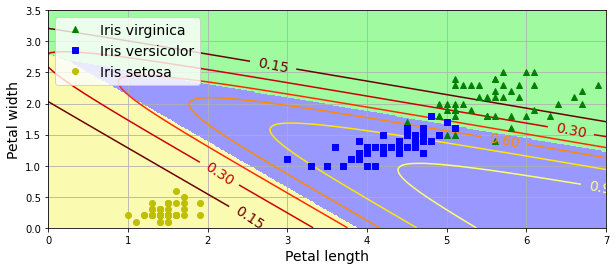

In [61]:
import matplotlib as mpl

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], 'g^', label='Iris virginica')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label='Iris setosa')

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap='hot')
plt.clabel(contour, inline=1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

> And now let’s measure the final model’s accuracy on the test set:

In [62]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

> Well we get even better performance on the test set. This variability is likely due to the very small size of the dataset: depending on how we sample the training set, validation set and the test set, we can get quite different results. Try changing the random seed and running the code again a few times, we will see that the results will vary.